In [1]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 02/22/26 22:46:17


### Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Load data

#### Credit Card Churn Prediction
* https://www.kaggle.com/datasets/anwarsan/credit-card-bank-churn

Business Problem  
A business manager of a consumer credit card bank is facing the problem of customer attrition. They want to analyze the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off.
* Target variable: **Attrition_Flag**

Columns
* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - High School, College, Post-Graduate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

In [3]:
# Read data from file (credit_card_churners_1_2500.csv) into dataframe
#  NOTE: Use CLIENTNUM as the index column
df = pd.read_csv('https://raw.githubusercontent.com/vjavaly/Baruch-OMSBA-CIS-9660/main/data/credit_card_churners_1_2500.csv', sep=',')

### Examine data

In [4]:
#Number of rows and columns
df.shape

(2500, 24)

In [5]:
#Initial information to understand dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 2500 non-null   int64  
 1   Attrition_Flag            2500 non-null   int64  
 2   Customer_Age              2391 non-null   float64
 3   Dependent_count           2500 non-null   int64  
 4   Education_Level           2500 non-null   float64
 5   Income_Category           2500 non-null   float64
 6   Card_Category             2500 non-null   float64
 7   Months_on_book            2500 non-null   int64  
 8   Total_Relationship_Count  2500 non-null   int64  
 9   Months_Inactive_12_mon    2500 non-null   int64  
 10  Contacts_Count_12_mon     2500 non-null   int64  
 11  Credit_Limit              2500 non-null   float64
 12  Total_Revolving_Bal       2500 non-null   int64  
 13  Avg_Open_To_Buy           2500 non-null   float64
 14  Total_Am

In [6]:
#Datatypes of columns
df.dtypes

CLIENTNUM                     int64
Attrition_Flag                int64
Customer_Age                float64
Dependent_count               int64
Education_Level             float64
Income_Category             float64
Card_Category               float64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Gender_F                      int64
Gender_M                      int64
Marital_Status_Divorced       int64
Marital_Status_Married        int64
Marital_Status_Single         int64
dtype: object

In [7]:
df.sample(20)
#observation: number values are set for categorical variables
#no need to modify

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
1170,712128258,1,49.0,4,0.0,0.0,1.0,40,5,3,...,0.805,15872,116,0.681,0.155,1,0,0,0,1
1932,715015683,1,44.0,2,1.0,1.0,0.0,34,5,3,...,0.777,1766,39,0.625,0.374,0,1,0,0,1
188,819977058,1,46.0,2,0.0,1.0,0.0,41,3,3,...,0.998,3432,71,0.972,0.490,0,1,0,0,1
1851,713577483,1,47.0,4,0.0,2.0,0.0,35,3,3,...,0.632,1570,31,0.722,0.256,0,1,0,1,0
1119,816772908,1,38.0,3,0.0,1.0,1.0,33,6,1,...,0.767,4533,78,0.472,0.052,0,1,0,0,1
158,719335233,1,47.0,3,0.0,0.0,1.0,27,5,3,...,0.445,3610,75,0.531,0.065,1,0,0,1,0
1769,778873608,1,44.0,4,0.0,2.0,1.0,25,3,1,...,0.734,14335,116,0.758,0.057,0,1,0,1,0
164,709957158,1,48.0,4,0.0,1.0,0.0,40,5,1,...,0.852,3942,65,0.625,0.895,0,1,0,1,0
1548,713303733,1,NaN,1,1.0,3.0,0.0,41,6,3,...,0.636,1564,33,0.500,0.462,0,1,0,1,0
163,716853258,1,64.0,1,1.0,0.0,0.0,45,5,3,...,0.904,4253,72,0.895,0.000,0,1,0,0,1


In [8]:
#Transcibe to allow table to fit in screen
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,2500.0,7.394680e+08,3.672944e+07,7.080855e+08,7.130794e+08,7.181699e+08,7.733276e+08,8.283431e+08
Attrition_Flag,2500.0,8.452000e-01,3.617863e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Customer_Age,2391.0,4.614262e+01,7.906842e+00,2.600000e+01,4.100000e+01,4.600000e+01,5.150000e+01,7.300000e+01
Dependent_count,2500.0,2.366400e+00,1.265856e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Education_Level,2500.0,6.016000e-01,6.607966e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
Income_Category,2500.0,8.540000e-01,9.530201e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
Card_Category,2500.0,8.920000e-02,3.448056e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
Months_on_book,2500.0,3.582920e+01,7.857425e+00,1.300000e+01,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,2500.0,3.836400e+00,1.537849e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,2500.0,2.342800e+00,1.008412e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00


In [9]:
df.head(21)

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,719999508,1,37.0,3,0.0,1.0,0.0,24,3,1,...,1.561,2438,45,0.607,0.069,0,1,0,1,0
1,716713533,1,53.0,3,2.0,2.0,0.0,44,5,2,...,0.542,3393,58,0.871,0.065,0,1,0,0,1
2,711800658,0,42.0,3,0.0,0.0,0.0,36,2,3,...,0.577,2465,42,0.355,0.000,1,0,0,0,1
3,719384433,0,44.0,3,0.0,0.0,0.0,28,5,2,...,0.654,2581,57,0.781,0.641,1,0,1,0,0
4,718894233,1,53.0,2,1.0,1.0,0.0,36,6,2,...,0.698,2116,63,0.575,0.471,1,0,0,1,0
5,820596183,1,58.0,2,1.0,3.0,0.0,53,2,3,...,1.071,2311,48,0.714,0.098,0,1,0,1,0
6,778832883,1,47.0,3,2.0,0.0,0.0,28,1,3,...,0.741,13769,104,0.857,0.116,1,0,0,1,0
7,716653758,1,55.0,0,0.0,1.0,0.0,36,3,3,...,0.739,4226,74,0.850,0.000,0,1,0,0,1
8,716643033,0,41.0,2,1.0,0.0,0.0,31,3,3,...,1.056,2981,40,0.481,0.828,1,0,0,1,0
9,779320008,0,43.0,3,1.0,2.0,0.0,25,3,3,...,0.719,2180,31,0.409,0.868,0,1,0,1,0


### Perform all the necessary data preparation steps

In [10]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

In [11]:
#identify if missing values exist in dataset
df.isnull().sum()

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                109
Dependent_count               0
Education_Level               0
Income_Category               0
Card_Category                 0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                  0
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Amt_Chng_Q4_Q1          0
Total_Trans_Amt               0
Total_Trans_Ct                0
Total_Ct_Chng_Q4_Q1           0
Avg_Utilization_Ratio         0
Gender_F                      0
Gender_M                      0
Marital_Status_Divorced       0
Marital_Status_Married        0
Marital_Status_Single         0
dtype: int64

In [12]:
#showcase rows with missing values
df[df.isnull().any(axis=1)]

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
17,713003358,0,NaN,3,1.0,2.0,0.0,30,2,2,...,1.017,4983,40,0.379,0.005,0,1,0,0,1
31,717547383,1,NaN,2,1.0,0.0,0.0,32,2,3,...,0.736,4233,77,0.791,0.482,1,0,0,1,0
48,716564433,0,NaN,1,1.0,0.0,0.0,36,3,2,...,0.294,1635,41,0.242,0.000,1,0,0,0,1
72,788876208,1,NaN,2,1.0,0.0,0.0,27,5,3,...,0.603,3826,71,0.543,0.000,1,0,0,0,1
77,714030183,1,NaN,0,1.0,2.0,1.0,36,5,3,...,1.229,3259,65,0.585,0.043,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,718599108,1,NaN,3,1.0,0.0,0.0,39,5,3,...,0.514,4419,64,0.730,0.363,1,0,0,1,0
2363,789830058,1,NaN,4,0.0,2.0,0.0,34,4,1,...,0.621,1384,36,2.273,0.073,0,1,0,0,1
2435,708646233,1,NaN,1,0.0,0.0,0.0,36,3,2,...,0.559,3632,50,0.923,0.075,1,0,1,0,0
2453,713617608,1,NaN,3,0.0,3.0,1.0,33,5,2,...,1.051,4217,79,0.795,0.053,0,1,0,1,0


In [13]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [14]:
cols_to_impute = ['Customer_Age']

In [15]:
#Activate SimpleImputer to replace NaN in Customer_Age with average
#Replace NaN with average value of age
df[cols_to_impute] = imp_mean.fit_transform(df[cols_to_impute])
df.head(21)

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,719999508,1,37.000000,3,0.0,1.0,0.0,24,3,1,...,1.561,2438,45,0.607,0.069,0,1,0,1,0
1,716713533,1,53.000000,3,2.0,2.0,0.0,44,5,2,...,0.542,3393,58,0.871,0.065,0,1,0,0,1
2,711800658,0,42.000000,3,0.0,0.0,0.0,36,2,3,...,0.577,2465,42,0.355,0.000,1,0,0,0,1
3,719384433,0,44.000000,3,0.0,0.0,0.0,28,5,2,...,0.654,2581,57,0.781,0.641,1,0,1,0,0
4,718894233,1,53.000000,2,1.0,1.0,0.0,36,6,2,...,0.698,2116,63,0.575,0.471,1,0,0,1,0
5,820596183,1,58.000000,2,1.0,3.0,0.0,53,2,3,...,1.071,2311,48,0.714,0.098,0,1,0,1,0
6,778832883,1,47.000000,3,2.0,0.0,0.0,28,1,3,...,0.741,13769,104,0.857,0.116,1,0,0,1,0
7,716653758,1,55.000000,0,0.0,1.0,0.0,36,3,3,...,0.739,4226,74,0.850,0.000,0,1,0,0,1
8,716643033,0,41.000000,2,1.0,0.0,0.0,31,3,3,...,1.056,2981,40,0.481,0.828,1,0,0,1,0
9,779320008,0,43.000000,3,1.0,2.0,0.0,25,3,3,...,0.719,2180,31,0.409,0.868,0,1,0,1,0


In [16]:
#find correlation values between variables in dataset
correlation_matrix = df.corr()
correlation_matrix

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
CLIENTNUM,1.000000,0.072781,0.007462,0.014532,0.015445,-0.006561,0.024430,0.127908,0.010976,-0.006876,...,0.035289,-0.012703,0.029471,0.036052,0.000640,0.010411,-0.010411,0.043845,-0.007592,-0.020830
Attrition_Flag,0.072781,1.000000,-0.030419,0.005065,-0.067256,0.019147,-0.004746,-0.023241,0.131394,-0.153927,...,0.107449,0.168242,0.361239,0.280367,0.179934,-0.034873,0.034873,0.024299,0.035886,-0.052092
Customer_Age,0.007462,-0.030419,1.000000,-0.109946,0.005632,0.030179,-0.035713,0.779267,0.002934,0.066050,...,-0.105927,-0.068006,-0.081734,-0.026991,-0.005592,0.016417,-0.016417,-0.033270,0.062367,-0.041441
Dependent_count,0.014532,0.005065,-0.109946,1.000000,-0.016775,0.030097,0.030523,-0.092917,-0.029424,-0.014735,...,-0.027180,0.026629,0.061649,0.027229,-0.014883,0.041087,-0.041087,0.002343,0.004759,-0.006336
Education_Level,0.015445,-0.067256,0.005632,-0.016775,1.000000,0.020069,0.036606,0.013093,0.005534,0.024278,...,0.013026,-0.029287,-0.040791,-0.022249,-0.040397,-0.019279,0.019279,0.009316,-0.003960,-0.002052
Income_Category,-0.006561,0.019147,0.030179,0.030097,0.020069,1.000000,0.098099,0.032045,0.018644,-0.022850,...,-0.002106,0.030308,-0.057912,-0.022016,-0.288396,-0.737524,0.737524,0.001945,0.017626,-0.019091
Card_Category,0.024430,-0.004746,-0.035713,0.030523,0.036606,0.098099,1.000000,-0.024800,-0.100759,-0.008567,...,0.016449,0.202599,0.151974,-0.010844,-0.207769,-0.090897,0.090897,0.000155,-0.050776,0.051251
Months_on_book,0.127908,-0.023241,0.779267,-0.092917,0.013093,0.032045,-0.024800,1.000000,0.005038,0.092035,...,-0.093841,-0.072119,-0.072185,-0.015299,-0.012711,-0.002217,0.002217,-0.020528,0.021213,-0.008105
Total_Relationship_Count,0.010976,0.131394,0.002934,-0.029424,0.005534,0.018644,-0.100759,0.005038,1.000000,0.052176,...,0.042641,-0.349449,-0.259596,0.050439,0.056825,-0.035527,0.035527,0.011850,-0.006556,-0.001075
Months_Inactive_12_mon,-0.006876,-0.153927,0.066050,-0.014735,0.024278,-0.022850,-0.008567,0.092035,0.052176,1.000000,...,-0.026771,-0.044330,-0.048099,-0.063892,0.010164,0.006279,-0.006279,-0.013305,-0.015127,0.023949


### Separate independent and dependent variables
* Independent variables: All remaining variables except Attrition_Flag
* Dependent variable: Attrition_Flag

In [17]:
#Set data variables for training
X = df.iloc[:, :-2]
y = df.iloc[:, 1]

### Normalization and Standardization

In [18]:
#Normalize data values
X_normalized = (X - X.min()) / (X.max() - X.min())

In [19]:
X_normalized.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced
0,0.099071,1.0,0.234043,0.6,0.0,0.333333,0.0,0.255814,0.4,0.166667,...,0.324195,0.320756,0.600232,0.107561,0.259843,0.163436,0.069347,0.0,1.0,0.0
1,0.071747,1.0,0.574468,0.6,1.0,0.666667,0.0,0.720930,0.8,0.333333,...,0.491061,0.516345,0.205882,0.162345,0.362205,0.234518,0.065327,0.0,1.0,0.0
2,0.030894,0.0,0.340426,0.6,0.0,0.000000,0.0,0.534884,0.2,0.500000,...,0.000000,0.061873,0.219427,0.109110,0.236220,0.095584,0.000000,1.0,0.0,0.0
3,0.093956,0.0,0.382979,0.6,0.0,0.000000,0.0,0.348837,0.8,0.333333,...,0.477950,0.019243,0.249226,0.115764,0.354331,0.210285,0.644221,1.0,0.0,1.0
4,0.089880,1.0,0.574468,0.4,0.5,0.333333,0.0,0.534884,1.0,0.333333,...,0.552642,0.045065,0.266254,0.089089,0.401575,0.154820,0.473367,1.0,0.0,0.0


In [20]:
#Standardize data values
X_standardized = (X - X.mean()) / X.std()

In [21]:
X_standardized.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced
0,-0.530050,0.427877,-1.182365,0.500531,-0.910416,0.153197,-0.258696,-1.505481,-0.543876,-1.331598,...,-0.441777,0.366107,3.684025,-0.579939,-0.844684,-0.450079,-0.747026,-1.051526,1.051526,-0.362879
1,-0.619515,0.427877,0.886828,0.500531,2.116234,1.202493,-0.258696,1.039883,0.756641,-0.339940,...,0.078788,1.089682,-1.031909,-0.303512,-0.296177,0.625296,-0.761379,-1.051526,1.051526,-0.362879
2,-0.753273,-2.336186,-0.535742,0.500531,-0.910416,-0.896099,-0.258696,0.021737,-1.194135,0.651718,...,-1.453159,-0.591620,-0.869929,-0.572124,-0.971263,-1.476573,-0.994626,0.950618,-0.950618,-0.362879
3,-0.546796,-2.336186,-0.277093,0.500531,-0.910416,-0.896099,-0.258696,-0.996408,0.756641,-0.339940,...,0.037886,-0.749329,-0.513573,-0.538547,-0.338370,0.258691,1.305550,0.950618,-0.950618,2.754638
4,-0.560143,0.427877,0.886828,-0.289448,0.602909,0.153197,-0.258696,0.021737,1.406900,-0.339940,...,0.270901,-0.653803,-0.309941,-0.673142,-0.085213,-0.580427,0.695519,0.950618,-0.950618,-0.362879


### Display a sample row of the final independent variables

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 2500 non-null   int64  
 1   Attrition_Flag            2500 non-null   int64  
 2   Customer_Age              2500 non-null   float64
 3   Dependent_count           2500 non-null   int64  
 4   Education_Level           2500 non-null   float64
 5   Income_Category           2500 non-null   float64
 6   Card_Category             2500 non-null   float64
 7   Months_on_book            2500 non-null   int64  
 8   Total_Relationship_Count  2500 non-null   int64  
 9   Months_Inactive_12_mon    2500 non-null   int64  
 10  Contacts_Count_12_mon     2500 non-null   int64  
 11  Credit_Limit              2500 non-null   float64
 12  Total_Revolving_Bal       2500 non-null   int64  
 13  Avg_Open_To_Buy           2500 non-null   float64
 14  Total_Am

### Split data into training and test sets

In [23]:
#Separate data into 75 training and 25 testing
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y,test_size = 0.25, random_state=2, stratify=y)

### Train Logistic Regression model

In [24]:
#Activation
log_model = LogisticRegression(max_iter = 100000, solver='newton-cg')

In [25]:
#Check default hyperparameters
log_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100000,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [26]:
#Train logistic model
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=100000, solver='newton-cg')

### If the above results in error, review the error message, look up the documentation for LogisticRegression, change the appropriate model hyperparameter and re-train the model
* Repeat until there is no error

### Test model

In [27]:
# Generate predictions against the test set
predictions = log_model.predict(X_test)
print(predictions)

[1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1
 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 0 1 1 0 1 1 1 1 

### Model evaluation
#### Goal: Model accuracy must exceed 91%

In [28]:
# Establish & Print model accuracy
accuracy = log_model.score(X_test, y_test)
print("Accuracy of the model =", round((accuracy * 100), 2), "%")

Accuracy of the model = 100.0 %


In [29]:
#Print confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
cnf_matrix

array([[ 97,   0],
       [  0, 528]])

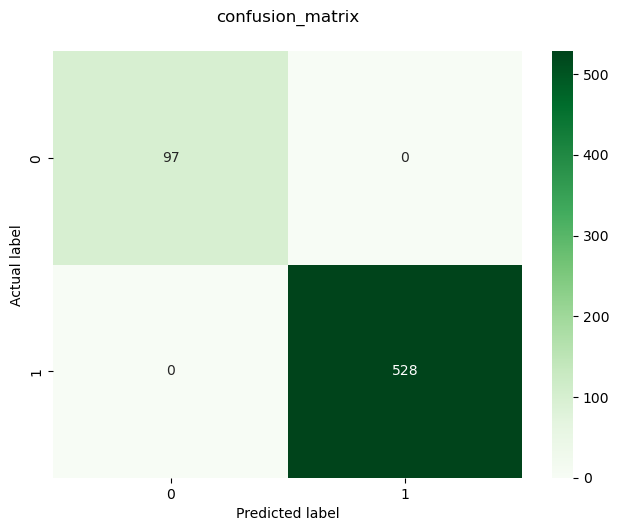

In [30]:
#Visualize Confusion Matrix using Heatmap
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Greens", fmt='g')

plt.tight_layout()
plt.title('confusion_matrix', y=1.05)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()